# Gerating artificial signal peptides

## 0 Introduction:
To avoid the combinatorial explosion that arises from the large number of possible amino acid sequences, an algorithm must be developed to narrow down the search space and identify the sequences that are most likely to function as signal peptides. This can be accomplished through a variety of computational methods, such as bioinformatics, machine learning, and statistical analysis.

One common approach is to use bioinformatics methods to analyze large sets of data on known signal peptides and identify patterns or features that are associated with signal peptide function. These features can then be used to predict the function of novel sequences.

Machine learning algorithms can also be used to predict signal peptides. These algorithms can be trained on large sets of data on known signal peptides, and can then be used to predict the function of novel sequences. Common machine learning algorithms used for this purpose include decision trees, random forests, and neural networks.

Another approach is to use statistical analysis to identify the regions of the peptide sequences that are most likely to function as signal peptides. This can be done by analyzing the frequency and distribution of different amino acids in known signal peptides and identifying those that are over-represented or under-represented in these sequences.

In summary, by developing an algorithm, we can narrow down the search space and identify the sequences that are most likely to function as signal peptides, thus avoiding combinatorial explosion. The algorithm we are showcasing here is based on a combination of bioinformatics, machine learning and statistical analysis.

### Agenda:
- Use AutoML predictions and synthetic signal peptide generation algorotihm to get a novel list of potential signal peptides

In [1]:
import numpy as np
import pandas as pd
import random
import os

In [2]:
def generate_artificial_peptide(list_of_probabilities: np.ndarray, amino_acids: np.ndarray, max_length=22) -> str:
    """
    Generate an artificial peptide based on a list of probabilities and amino acids.

    Parameters:
    ----------
    list_of_probabilities : numpy.ndarray
        2-D array of probability of amino acids in the peptide
    amino_acids : numpy.ndarray
        1-D array of amino acids.

    Returns:
    -------
    str
        Generated artificial peptide

    Notes:
    ------
    The length of the probability array should be same as the length of the peptide.
    """
    out_str = ''
    for i in range(len(list_of_probabilities)):
        # make synthetic signal peptide
        artificial_amino_acid = list(np.random.choice(amino_acids, 1, p=list_of_probabilities[i]))

        if artificial_amino_acid == ['-']:
            break

        out_str += artificial_amino_acid[0]
    return out_str


In [3]:
def add_dunder_tail(peptide:str , max_lenght:int=22 ):
    '''Adds a tail if a peptide is shorter than the specified max_len.
    '''
    if len(peptide) < max_lenght:
        difference = max_lenght - len(peptide)
        sequence = peptide + ('-'*difference)
    else:
        sequence = peptide


    return sequence

In [4]:
def generate_artificial_peptides(list_of_probabilities: np.ndarray, amino_acids: np.ndarray, n_peptides: int, max_len=22) -> pd.DataFrame:
    """
    Generate a dataframe of artificial peptides based on a list of probabilities and amino acids.

    Parameters:
    ----------
    list_of_probabilities : numpy.ndarray
        2-D array of probability of amino acids in the peptide
    amino_acids : numpy.ndarray
        1-D array of amino acids.
    n_peptides : int
        Number of peptides to generate

    Returns:
    -------
    pd.DataFrame
        Dataframe of generated artificial peptides with 'sequence' as column

    Notes:
    ------
    The length of the probability array should be same as the length of the peptide.
    """
    artificial_peptides = []
    lengths = []
    for i in range(n_peptides):
        peptide = generate_artificial_peptide(list_of_probabilities,amino_acids, max_length=max_len)
        if len(peptide) <= max_len:
            peptide_w_tail = add_dunder_tail(peptide, max_lenght = max_len)
        else:
            continue

        # save
        lengths.append(len(peptide))
        artificial_peptides.append(peptide_w_tail)

    df = pd.DataFrame(artificial_peptides, columns =['sequence'])
    df['length'] = lengths
    return df


In [5]:
def split_peptides_sequences(df_signalPP:pd.DataFrame):
    '''Split each AA for each position'''
    peptides_split = []
    for k,v in df_signalPP.iterrows():
        sequence = []
        for seq in v['sequence']:
            sequence.append(seq)
        peptides_split.append(sequence)

    # make a dataframe
    new_peptides = pd.DataFrame(peptides_split)
    new_peptides = new_peptides.fillna('-')

    return new_peptides

## 1 Amino acid probability matrix

Lets import our df_pwn dataframe that was made in a previous notebook and use the position specific scoring matrix for the generation of novel signal peptides

In [6]:
from google.colab import drive
drive.mount('/content/home')

Drive already mounted at /content/home; to attempt to forcibly remount, call drive.mount("/content/home", force_remount=True).


In [7]:
df_pwn =  pd.read_csv('/content/home/MyDrive/UNIVERSITY/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/02_All_signal_peptides/df_pwn_68_positions.csv')
df_pwn

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,Y,-
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.069877,0.001889,0.002833,0.001889,0.032106,0.021719,0.064212,0.037771,0.208687,0.084986,...,0.022663,0.028329,0.058546,0.193579,0.033994,0.018886,0.052880,0.014164,0.028329,0.000000
2,0.044381,0.007554,0.006610,0.007554,0.152975,0.047214,0.019830,0.050047,0.018886,0.190746,...,0.020774,0.052880,0.020774,0.053824,0.131256,0.053824,0.060434,0.025496,0.022663,0.000000
3,0.057602,0.001889,0.004721,0.004721,0.089707,0.019830,0.016053,0.064212,0.058546,0.175637,...,0.033994,0.041549,0.043437,0.056657,0.163362,0.100094,0.021719,0.010387,0.026440,0.000000
4,0.072710,0.004721,0.004721,0.007554,0.054769,0.032106,0.019830,0.077432,0.053824,0.155807,...,0.041549,0.040604,0.036827,0.045326,0.138810,0.096317,0.043437,0.023607,0.032106,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001889,0.000944,0.000000,0.000000,0.000000,0.997167
59,0.000000,0.000000,0.000000,0.000944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000944,0.000000,0.000000,0.000000,0.998111
60,0.000944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000944,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.998111
61,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [8]:
amino_acids = list(df_pwn.columns.values)

In [9]:
list_of_probabilities = []
for i in range(len(df_pwn)):
    list_of_probabilities.append(df_pwn.loc[i, :].values.tolist())

## 2 Load best model from AutoML

In [10]:
%%capture
!pip install h2o==3.40.0.2

In [11]:
import h2o
from h2o.automl import H2OAutoML

In [12]:
h2o.init(ip="localhost", min_mem_size_GB=8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp33rmcbq_
  JVM stdout: /tmp/tmp33rmcbq_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp33rmcbq_/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,4 months and 4 days
H2O_cluster_name:,H2O_from_python_unknownUser_3x9wq2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [13]:
best_model = h2o.load_model("/content/home/MyDrive/UNIVERSITY/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/06_H2O_AutoML/06.1_Best_models/Second_round/SPL22_DL_144817_1103.model")
best_model

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20230311_144817_model_11


Status of Neuron Layers: predicting abundance, regression, gaussian distribution, Quadratic loss, 8,221 weights/biases, 102.7 KB, 1,944,469 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate               rate_rms              momentum    mean_weight          weight_rms           mean_bias           bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ----------------------  --------------------  ----------  -------------------  -------------------  ------------------  -----------------------
    1        409      Input             15.0
    2        20       RectifierDropout  20.0       0.0   0.0   0.09918717924397921     0.2797011137008667    0.0         0.03443018373556212  0.22757196426391602  44.857533100229794  29.255279541015625
    3        1        Linear                       0.0   0.0   0.00014158465954281497  0.000462939846329391  0.0         0.7187022570520639   0.5571763515472412   -722.6552712581973  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.37484975870693116
RMSE: 0.6122497519043443
MAE: 0.5895017487967451
RMSLE: NaN
Mean Residual Deviance: 0.37484975870693116

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 0.0014905315706831063
RMSE: 0.03860740305541291
MAE: 0.00379052849264137
RMSLE: 0.027579477458618717
Mean Residual Deviance: 0.0014905315706831063

Cross-Validation Metrics Summary: 
                        mean         sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  -----------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.00377509   0.00456979  0.0157986     0.00661872    0.00365306    0.00122296    0.00293195    0.00285752    0.00120292    0.00116464    0.00119796    0.0011025
mean_residual_deviance  0.00148057   0.00404321  0.0129073     0.00155131    0.00018868    4.65767e-06   7.42372e-05   3.27378e-05   9.86865e-06   1.2847e-05    9.15351e-06   1.48465e-05
mse                     0.00148057   0.00404321  0.0129073     0.00155131    0.00018868    4.65767e-06   7.42372e-05   3.27378e-05   9.86865e-06   1.2847e-05    9.15351e-06   1.48465e-05
r2                      -0.00890514  0.154369    0.0309248     -0.00820842   0.0373416     -0.0450057    -0.0336647    0.389821      -0.111084     -0.135426     -0.15269      -0.0610597
residual_deviance       0.00148057   0.00404321  0.0129073     0.00155131    0.00018868    4.65767e-06   7.42372e-05   3.27378e-05   9.86865e-06   1.2847e-05    9.15351e-06   1.48465e-05
rmse                    0.0196833    0.034851    0.11361       0.0393866     0.0137361     0.00215816    0.0086161     0.00572169    0.00314144    0.00358428    0.00302548    0.00385312
rmsle                   0.015445     0.0239686   0.078008      0.0339246     0.0129943     0.00214292    0.0083464     0.00555289    0.0031189     0.00355223    0.00300352    0.00380628

Scoring History: 
    timestamp            duration           training_speed    epochs    iterations    samples      training_rmse    training_deviance    training_mae    training_r2
--  -------------------  -----------------  ----------------  --------  ------------  -----------  ---------------  -------------------  --------------  -------------
    2023-03-11 15:32:08  0.000 sec                            0         0             0            nan              nan                  nan             nan
    2023-03-11 15:32:08  43 min 45.817 sec  60644 obs/sec     9.73605   1             7156         0.0387917        0.0015048            0.00388409      0.0285783
    2023-03-11 15:

## 3 Signal peptide predictor algorithm

In [14]:
def signal_peptide_predictor(list_of_probabilities, amino_acids, n_peptides,  number_of_iterations:int)-> pd.DataFrame:
    '''Predicts best signal peptides from a number of iterations'''

    data = pd.DataFrame()
    for i in range(0,number_of_iterations):
        new_TO_NATURE_peptides = generate_artificial_peptides(list_of_probabilities, amino_acids, n_peptides=n_peptides, max_len = 22 )
        new_TO_NATURE_peptides = split_peptides_sequences(new_TO_NATURE_peptides)

        df_test = h2o.H2OFrame(pd.concat([new_TO_NATURE_peptides], axis='columns'))
        # make the df into categorical values
        for column in df_test.columns:
            if column != 'MM_N_peptide_abundance':
                df_test[column] = df_test[column].asfactor()

        #predict
        predicted = best_model.predict(df_test).as_data_frame()
        new_TO_NATURE_peptides['predictions'] = predicted['predict'].to_list()

        if len(data) == 0:
            data = new_TO_NATURE_peptides.copy()
        else:
            # concat to precious predictions
            data = pd.concat([data, new_TO_NATURE_peptides], axis=0)
            data = data.sort_values('predictions', ascending = False)
            data = data[0:1000]

        if i % 1000 == 0:
            print(f"Iteration {i}")

    return data

In [15]:
%%time
lets_predict_signal_peptides = signal_peptide_predictor(list_of_probabilities,
                                                        amino_acids,n_peptides = 1000,
                                                        number_of_iterations = 2000)

Output hidden; open in https://colab.research.google.com to view.

In [16]:
lets_predict_signal_peptides

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,predictions
674,M,L,F,S,F,Y,L,I,A,L,...,G,V,P,Y,A,F,A,T,E,0.165971
420,M,Y,P,R,Y,L,P,Y,L,L,...,A,I,T,A,L,-,-,-,-,0.157314
497,M,R,P,R,F,T,I,L,L,L,...,G,A,T,A,A,H,A,T,-,0.147745
380,M,L,I,S,L,L,F,L,L,L,...,L,A,M,A,L,F,S,N,-,0.124467
772,M,F,W,R,A,W,Q,F,L,L,...,L,S,A,M,A,F,Q,-,-,0.122586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,M,P,T,K,I,S,P,A,R,L,...,L,I,A,I,F,N,V,-,-,-0.070641
247,M,L,R,R,F,T,L,K,L,L,...,A,A,V,T,L,F,V,-,-,-0.070655
717,M,L,P,L,L,Y,S,A,L,L,...,M,A,V,T,L,Y,L,Q,-,-0.070675
539,M,R,F,S,I,L,F,L,L,L,...,L,F,A,A,A,C,S,P,D,-0.070696


In [18]:
lets_predict_signal_peptides.to_excel('/content/home/MyDrive/UNIVERSITY/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/07_GASPs/SPL22_144817_GASPs_0314_2.xlsx', index=False)


In [19]:
df_LPSPs =  pd.read_excel('/content/home/MyDrive/UNIVERSITY/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/07_GASPs/SPL22_144817_GASPs_0314_2.xlsx')
df_LPSPs

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,predictions
0,M,L,F,S,F,Y,L,I,A,L,...,G,V,P,Y,A,F,A,T,E,0.165971
1,M,Y,P,R,Y,L,P,Y,L,L,...,A,I,T,A,L,-,-,-,-,0.157314
2,M,R,P,R,F,T,I,L,L,L,...,G,A,T,A,A,H,A,T,-,0.147745
3,M,L,I,S,L,L,F,L,L,L,...,L,A,M,A,L,F,S,N,-,0.124467
4,M,F,W,R,A,W,Q,F,L,L,...,L,S,A,M,A,F,Q,-,-,0.122586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,P,T,K,I,S,P,A,R,L,...,L,I,A,I,F,N,V,-,-,-0.070641
996,M,L,R,R,F,T,L,K,L,L,...,A,A,V,T,L,F,V,-,-,-0.070655
997,M,L,P,L,L,Y,S,A,L,L,...,M,A,V,T,L,Y,L,Q,-,-0.070675
998,M,R,F,S,I,L,F,L,L,L,...,L,F,A,A,A,C,S,P,D,-0.070696


In [20]:
# Extract the predictions column as weights
weights = df_LPSPs["predictions"].values

# Remove the "predictions" column from the DataFrame
df_LPSPs_without_predictions = df_LPSPs.drop("predictions", axis=1)

# Calculate the number of positions in the PWM
num_positions = len(df_LPSPs_without_predictions.columns)

# Initialize an empty dictionary to store the PWM
pwm = {}

# Iterate over each position
for position in range(num_positions):
    # Get the column values for the current position
    column_values = df_LPSPs_without_predictions.iloc[:, position].values

    # Initialize a dictionary to store the amino acid weights at the current position
    position_weights = {}

    # Iterate over each amino acid in the column
    for amino_acid, weight in zip(column_values, weights):
        # Check if the amino acid is already in the position weights dictionary
        if amino_acid in position_weights:
            # Add the weight to the existing value
            position_weights[amino_acid] += weight
        else:
            # Initialize the weight for the amino acid
            position_weights[amino_acid] = weight

    # Normalize the weights to sum up to 1
    total_weight = sum(position_weights.values())
    for amino_acid in position_weights:
        position_weights[amino_acid] /= total_weight

    # Store the position weights in the PWM dictionary
    pwm[position] = position_weights

# Convert the PWM dictionary to a DataFrame
df_pwm = pd.DataFrame(pwm)

df_pwm

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
M,1.0,0.066220,0.012118,0.009195,0.004507,0.014781,0.045282,0.002140,0.009694,0.002515,...,0.002904,0.019839,0.021378,0.050232,0.008242,0.013831,0.008875,0.007360,-0.000608,NaN
L,NaN,0.177359,0.130261,0.076647,0.153429,0.259920,0.244798,0.313250,0.537583,0.509016,...,0.178866,0.435925,0.214114,0.113832,0.032548,0.178660,0.123365,0.161855,0.110215,0.011267
Y,NaN,0.118392,0.080343,0.010158,0.030144,0.032577,0.020503,0.023112,0.013389,0.010342,...,-0.001500,0.006613,0.006635,0.007395,0.010334,0.011158,0.032540,0.019760,0.009966,0.003795
R,NaN,0.228867,0.037540,0.157043,0.011837,0.083568,0.019117,0.032758,0.038435,0.008786,...,0.020933,NaN,0.002920,0.004946,0.003853,NaN,0.036157,0.004301,0.004673,0.011590
F,NaN,0.028111,0.182589,0.034621,0.179226,0.224122,0.079308,0.008407,0.060576,0.071687,...,0.067879,0.022594,0.025146,0.004356,0.030447,0.051131,0.120460,0.007211,0.010430,0.000024
K,NaN,0.051959,0.062213,0.024237,0.056884,0.023443,0.013168,0.006687,0.002627,0.000556,...,0.003510,0.000828,0.004072,0.008703,0.003331,0.008839,0.001080,0.004283,0.000239,0.002026
G,NaN,0.003101,-0.000393,0.031083,0.028823,0.003341,0.021924,0.044542,0.010370,0.015315,...,0.076012,0.025171,0.009558,0.013668,0.017382,0.012201,0.040683,0.014494,0.019168,0.010751
Q,NaN,0.055824,0.012940,0.021078,0.008426,0.015098,0.055721,0.013633,0.010910,-0.002187,...,0.009506,0.045554,0.004568,0.011879,0.012803,0.026403,0.020484,0.071509,0.040280,0.006257
P,NaN,0.024849,0.091075,0.089188,0.050895,-0.003225,0.067093,-0.001523,0.000958,0.008543,...,0.038331,0.009653,0.024142,0.036593,0.008745,0.082032,0.057990,0.036646,0.053074,0.024560
S,NaN,0.009840,0.045374,0.242741,0.076653,0.057083,0.018832,0.037952,0.006585,0.139699,...,0.049662,0.064461,0.141511,0.035551,0.045512,0.103948,0.017402,0.110571,0.018475,0.011236


In [21]:
# Create a pivot table with rows as positions and columns as amino acids
df_pivot = df_pwm.transpose()

# Fill NaN values with 0
df_pivot = df_pivot.fillna(0)

# Normalize the range of amino acids in the pivot dataset
df_pivot_norm = df_pivot.div(df_pivot.sum(axis=1), axis=0)

# Add a title to the pivot table
df_pivot_norm.index.name = "Position"
df_pivot_norm.columns.name = "Amino acid"

df_pivot_norm

Amino acid,M,L,Y,R,F,K,G,Q,P,S,...,W,N,H,C,I,T,A,D,E,-
Position,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.066220,0.177359,0.118392,0.228867,0.028111,0.051959,0.003101,0.055824,0.024849,0.009840,...,0.043294,0.017657,0.082809,-0.001116,0.020236,0.009731,0.029530,0.008847,0.000000,0.000000
2,0.012118,0.130261,0.080343,0.037540,0.182589,0.062213,-0.000393,0.012940,0.091075,0.045374,...,0.044397,0.065794,0.002718,0.003603,0.012892,0.050935,0.065116,0.007997,0.007020,0.000000
3,0.009195,0.076647,0.010158,0.157043,0.034621,0.024237,0.031083,0.021078,0.089188,0.242741,...,0.003418,0.044271,0.056822,0.004350,0.095941,0.033635,0.020779,0.003152,0.010637,0.000000
4,0.004507,0.153429,0.030144,0.011837,0.179226,0.056884,0.028823,0.008426,0.050895,0.076653,...,0.037773,0.068127,0.041020,0.002488,0.109454,0.067086,0.042771,0.006925,0.014971,0.000000
5,0.014781,0.259920,0.032577,0.083568,0.224122,0.023443,0.003341,0.015098,-0.003225,0.057083,...,0.104261,0.016701,0.004508,0.000575,0.034109,0.053854,0.021164,0.022787,0.000000,0.000000
6,0.045282,0.244798,0.020503,0.019117,0.079308,0.013168,0.021924,0.055721,0.067093,0.018832,...,0.018580,0.017235,0.011727,0.020377,0.210112,0.067852,0.039065,-0.000881,0.007076,0.000000
7,0.002140,0.313250,0.023112,0.032758,0.008407,0.006687,0.044542,0.013633,-0.001523,0.037952,...,0.012211,0.001174,0.010921,0.013092,0.204140,0.130784,0.086777,0.006196,0.000000,0.000000
8,0.009694,0.537583,0.013389,0.038435,0.060576,0.002627,0.010370,0.010910,0.000958,0.006585,...,0.011390,0.000000,0.010615,0.016946,0.038712,0.011230,0.103159,0.000000,0.002321,0.000000


In [22]:
%pip install logomaker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 67.1 MB/s eta 0:00:00


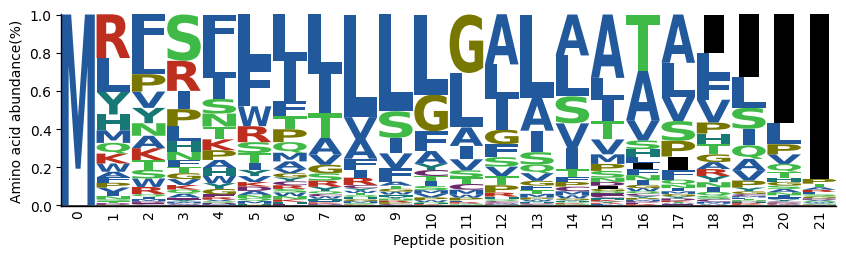

In [23]:
import logomaker as lm
import matplotlib.pyplot as plt

logo = lm.Logo(df_pivot_norm,
               shade_below=.5,
               fade_below=.5,
               color_scheme='NajafabadiEtAl2017',
               font_name='DejaVu Sans'
               )

# style using Logo methods
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
logo.ax.set_ylabel("Amino acid abundance(%)")
logo.ax.set_xlabel("Peptide position")
logo.ax.xaxis.set_ticks_position('none')
logo.ax.xaxis.set_tick_params(pad=-1)

# Save the logo as a high-quality image
save_path = '/content/home/MyDrive/UNIVERSITY/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/07_GASPs/SPL22_144817_logo_2.png'
plt.savefig(save_path, dpi=600, bbox_inches='tight', pad_inches=0)